### Getting satellite images

for publication

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
from IPython.display import display, Image
import pandas as pd
import geopandas as gpd
import numpy as np
import h5py
from osgeo import gdal, ogr

In [2]:
ls ../data/satellite/

KE_250_B1.tif         TZ_B1-1.tif*          TZ_B6_VCID_2-0.tif*
KE_250_B2.tif*        TZ_B2-0.tif*          TZ_B6_VCID_2-1.tif*
KE_250_B3.tif*        TZ_B2-1.tif*          TZ_B7-0.tif*
KE_250_B4.tif*        TZ_B3-0.tif*          TZ_B7-1.tif*
KE_250_B5.tif*        TZ_B3-1.tif*          TZ_B8-0.tif*
KE_250_B6_VCID_2.tif* TZ_B4-0.tif*          TZ_B8-1.tif*
KE_250_B8.tif         TZ_B4-1.tif*          TZ_lights-0.tif*
KE_250_lights.tif*    TZ_B5-0.tif*          TZ_lights-1.tif*
TZ_B1-0.tif*          TZ_B5-1.tif*          small/


In [3]:
# getting satellite data
channels = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6_VCID_2', 'B8', 'lights']

bands = {}

for ch in channels:
    filename = '../data/satellite/KE_250_%s.tif' % ch
    print filename
    satellite_gdal = gdal.Open(filename)
    band = satellite_gdal.GetRasterBand(1)
    band_array = band.ReadAsArray()
    bands[ch] = np.nan_to_num(band_array)
    if ch == 'B1':
        geotransform = satellite_gdal.GetGeoTransform()    

../data/satellite/KE_250_B1.tif
../data/satellite/KE_250_B2.tif
../data/satellite/KE_250_B3.tif
../data/satellite/KE_250_B4.tif
../data/satellite/KE_250_B5.tif
../data/satellite/KE_250_B6_VCID_2.tif
../data/satellite/KE_250_B8.tif
../data/satellite/KE_250_lights.tif


In [4]:
def coordinates_to_pixels(lon_coord, lat_coord, geotransform):
    """

    Returns lat lon coordinates from pixel position 
    using an affine transformation

    See http://www.gdal.org/gdal_datamodel.html

    Outside of the class because it's used in parallel

    Input:
        (array) geotransfrom
        (int) column, row
    Returns:
        (float) lat, lon projection coordinates

    """
    x_origin = geotransform[0]
    y_origin = geotransform[3]
    pixel_width = geotransform[1]
    pixel_height = geotransform[5]
    rotation_x = geotransform[2]
    rotation_y = geotransform[4]
    #
    # The affine transformation
    #
    row = (lat_coord - y_origin) / pixel_height
    col = (lon_coord - x_origin) / pixel_width
    return (int(row), int(col))

def pixel_to_coordinates(column, row, geotransform):
    """

    Returns lat lon coordinates from pixel position 
    using an affine transformation

    See http://www.gdal.org/gdal_datamodel.html

    Outside of the class because it's used in parallel

    Input:
        (array) geotransfrom
        (int) column, row
    Returns:
        (float) lat, lon projection coordinates

    """
    x_origin = geotransform[0]
    y_origin = geotransform[3]
    pixel_width = geotransform[1]
    pixel_height = geotransform[5]
    rotation_x = geotransform[2]
    rotation_y = geotransform[4]
    # The affine transformation
    lon_coord = x_origin + (column * pixel_width) + (row * rotation_x)
    lat_coord = y_origin + (column * rotation_y) + (row * pixel_height)
    return (lon_coord, lat_coord)

(36.88033398952696, -1.3497187143895815)


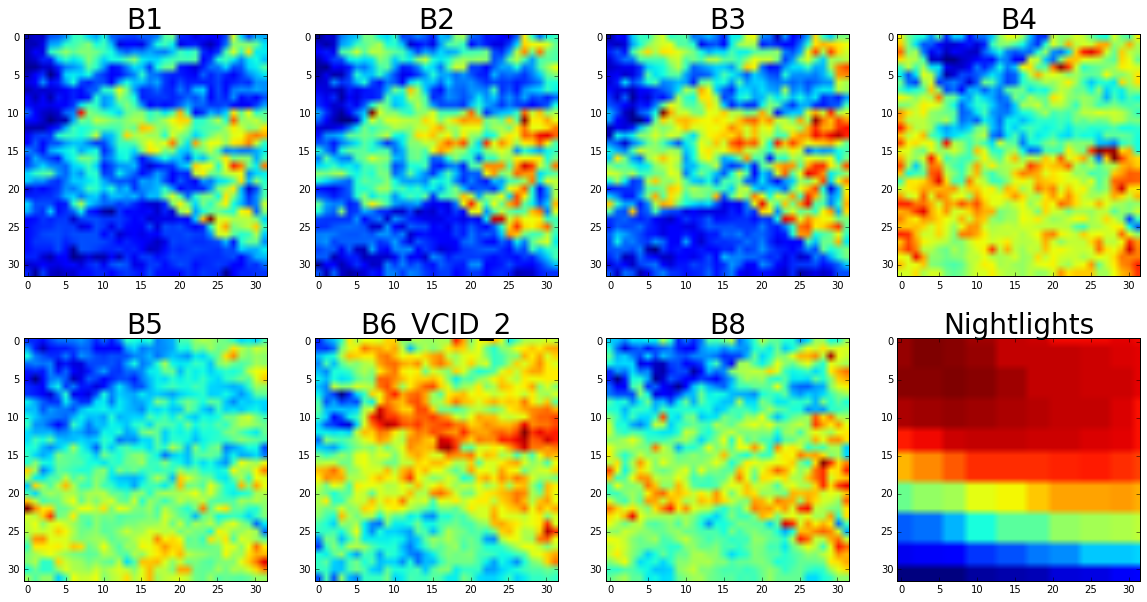

In [6]:
# nairobi
nairobi_lon, nairobi_lat = 36.81, -1.28
(r_0, c_0) = coordinates_to_pixels(nairobi_lon, nairobi_lat, geotransform)
print pixel_to_coordinates(c_0 + 32, r_0 + 32, geotransform)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# row one
axes[0, 0].imshow(bands['B1'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[0, 0].set_title('B1', fontsize=28)
axes[0, 1].imshow(bands['B2'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[0, 1].set_title('B2', fontsize=28)
axes[0, 2].imshow(bands['B3'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[0, 2].set_title('B3', fontsize=28)
axes[0, 3].imshow(bands['B4'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[0, 3].set_title('B4', fontsize=28)
# row two
axes[1, 0].imshow(bands['B5'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[1, 0].set_title('B5', fontsize=28)
axes[1, 1].imshow(bands['B6_VCID_2'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[1, 1].set_title('B6_VCID_2', fontsize=28)
axes[1, 2].imshow(bands['B8'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[1, 2].set_title('B8', fontsize=28)
axes[1, 3].imshow(bands['lights'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[1, 3].set_title('Nightlights', fontsize=28)
plt.savefig('populated_satellite_image.png', bbox_inches='tight', dpi=300)

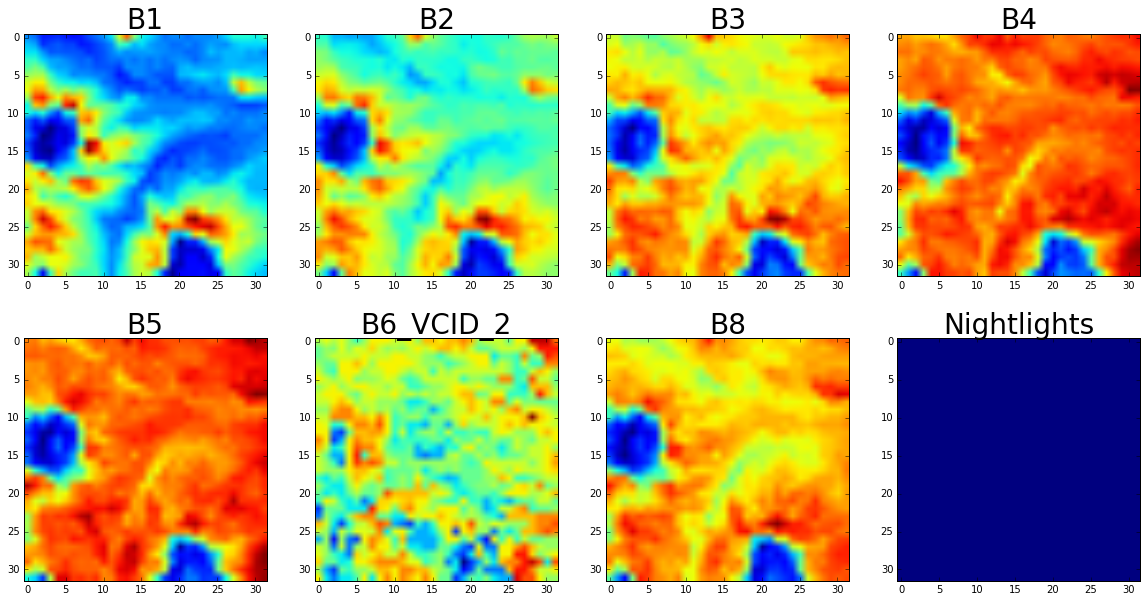

In [7]:
# marsabit
marsabit_lon, marsabit_lat = 37.42, 2.6
(r_0, c_0) = coordinates_to_pixels(marsabit_lon, marsabit_lat, geotransform)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
# row one
axes[0, 0].imshow(bands['B1'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[0, 0].set_title('B1', fontsize=28)
axes[0, 1].imshow(bands['B2'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[0, 1].set_title('B2', fontsize=28)
axes[0, 2].imshow(bands['B3'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[0, 2].set_title('B3', fontsize=28)
axes[0, 3].imshow(bands['B4'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[0, 3].set_title('B4', fontsize=28)
# row two
axes[1, 0].imshow(bands['B5'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[1, 0].set_title('B5', fontsize=28)
axes[1, 1].imshow(bands['B6_VCID_2'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[1, 1].set_title('B6_VCID_2', fontsize=28)
axes[1, 2].imshow(bands['B8'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[1, 2].set_title('B8', fontsize=28)
axes[1, 3].imshow(bands['lights'][r_0:r_0 + 32, c_0:c_0 + 32])
axes[1, 3].set_title('Nightlights', fontsize=28)
plt.savefig('remote_satellite_image.png', bbox_inches='tight', dpi=300)